In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
from itertools import product, count, chain
from keras.utils import to_categorical

%matplotlib inline

In [18]:
lista_imagens = list(i for i in os.listdir(r'samples') if i.endswith('.png'))

df = pd.DataFrame({
    'imagens': lista_imagens
})
df['solucao'] = df['imagens'].apply(lambda x: os.path.splitext(x)[0])
df['caminho_imagem'] = df['imagens'].apply(lambda x: os.path.join('samples',x))
df

,imagens,solucao,caminho_imagem
0,226md.png,226md,samples\226md.png
1,22d5n.png,22d5n,samples\22d5n.png
2,2356g.png,2356g,samples\2356g.png
3,23mdg.png,23mdg,samples\23mdg.png
4,23n88.png,23n88,samples\23n88.png
...,...,...,...
1035,yx2d4.png,yx2d4,samples\yx2d4.png
1036,yxd7m.png,yxd7m,samples\yxd7m.png
1037,yy824.png,yy824,samples\yy824.png
1038,yyg5g.png,yyg5g,samples\yyg5g.png


In [19]:
alphabet = list(frozenset(chain.from_iterable(df['solucao'].tolist())))
alphabet.sort()
''.join(alphabet)

'2345678bcdefgmnpwxy'

In [20]:
ids = dict([(ch, alphabet.index(ch)) for ch in alphabet])
ids['e']

10

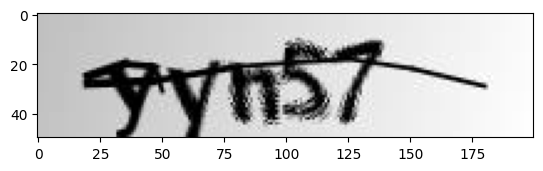

In [21]:
img = cv.imread('samples\yyn57.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, 'gray')

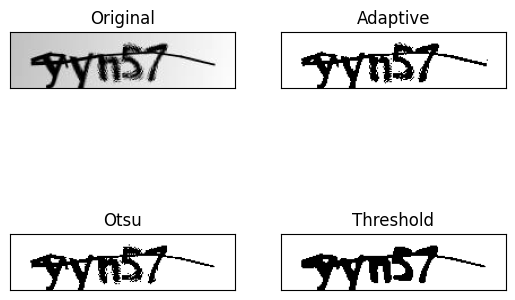

In [22]:
th = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 17, 2)

ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

titles = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images = [img, th, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.title('Threshold')
plt.show()

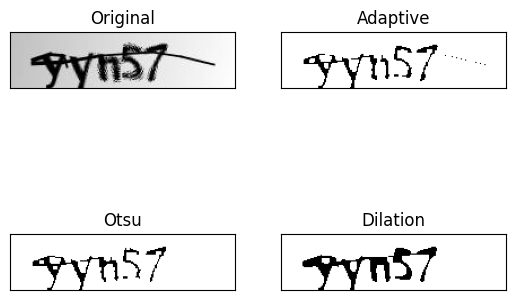

In [23]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv.dilate(th, kernel, iterations=1)
dilation2 = cv.dilate(th2, kernel, iterations=1)
dilation3 = cv.dilate(th3, kernel, iterations=1)

titles2 = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images2 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Dilation')
plt.show()

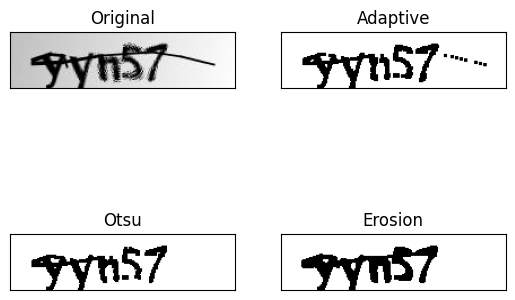

In [24]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv.erode(dilation, kernel, iterations=1)
erosion2 = cv.erode(dilation2, kernel, iterations=1)
erosion3 = cv.erode(dilation3, kernel, iterations=1)

titles3 = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images3 = [img, erosion, erosion2, erosion3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Erosion')
plt.show()

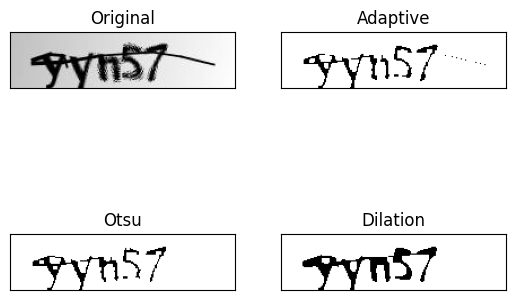

In [25]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv.dilate(erosion, kernel, iterations=1)
dilation2 = cv.dilate(erosion2, kernel, iterations=1)
dilation3 = cv.dilate(erosion3, kernel, iterations=1)

titles4 = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images4 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Dilation')
plt.show()

In [26]:
# x, y, w, h = 31, 13, 23, 39
# for i in range(5):
#     cv.rectangle(img, (x, y), (x+y, y+h), (0,255,0), 2)
#     cv.rectangle(dilation, (x, y), (x+y, y+h), (0,255,0), 2)
#     cv.rectangle(dilation2, (x, y), (x+y, y+h), (0,255,0), 2)
#     cv.rectangle(dilation3, (x, y), (x+y, y+h), (0,255,0), 2)
#     x+=w

# titles5 = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
# images5 = [img, dilation, dilation2, dilation3]

# for i in range(4):
#     plt.subplot(2, 2, i + 1), plt.imshow(images5[i], 'gray')
#     plt.title(titles5[i])
#     plt.xticks([]), plt.yticks([])
    
# plt.title('Contourning')
# plt.show()

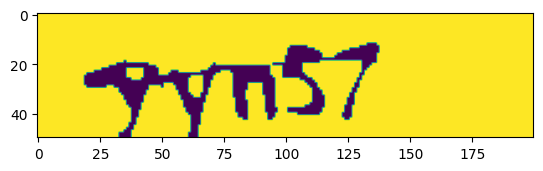

In [29]:
plt.imshow(dilation3)

In [ ]:
dilation3.